### **Read Dataset**

In [ ]:
import pandas as pd
import numpy as np

rs = 0
df = pd.read_csv(f'MCSDatasetNEXTCONLab.csv')

df['Ligitimacy'] = df['Ligitimacy'].replace(0,-1)

trDf = df[:10139][:]
teDf = df[10139:][:]

trDf = trDf.apply(lambda x: (x-45)*10000 if x.name == 'Latitude' else x)
trDf = trDf.apply(lambda x: (x+75)*10000 if x.name == 'Longitude' else x)
teDf = teDf.apply(lambda x: (x-45)*10000 if x.name == 'Latitude' else x)
teDf = teDf.apply(lambda x: (x+75)*10000 if x.name == 'Longitude' else x)

trY = trDf['Ligitimacy'].values
teY = teDf['Ligitimacy'].values

trX = trDf.drop(columns=['ID', 'Day', 'Ligitimacy']).values
teX = teDf.drop(columns=['ID', 'Day', 'Ligitimacy']).values

In [ ]:
print(f"type of Y : {type(trY)}  & type of X : {type(trX)}")
print(f"type of Y : {trY.shape}  & type of X : {trX.shape}")

type of Y : <class 'numpy.ndarray'>  & type of X : <class 'numpy.ndarray'>
type of Y : (10139,)  & type of X : (10139, 10)


### **Part 1**
Develop machine learning pipelines

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches

"""
parameters : 
  model : trined model
  x : features
  y : labels
  plot : if true --> plot confusion matrix 

return model accuracy on testing data
"""
def predict(model , x , y , plot = True):

  pred = model.predict(x)
  accuracy = accuracy_score(y_true = y , y_pred =  pred) *100

  if(plot == True):
    
    plot_confusion_matrix(model , x ,y)
    title = type(model).__name__+' : '+str(accuracy)+' %'
    plt.title(title)

  return accuracy

def plot_barchar(models_name , accuracy_dict ,title = 'title' , xlabel = 'xlabel' , ylabel = 'ylabel'):

  df = pd.DataFrame(accuracy_dict, index = models_name)
  ax = df.plot.bar(rot=0)
  plt.legend(loc = 'upper right')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

"""
function : train models , get their accuacies , plot confusion matrix

parameters : 
  models : list of models 
  tr_x : training fetures
  tr_y : training lables
  te_x : testing fetures
  te_y : testing lables
  
  nrows : num of plotting rows (default = 3)
  ncols : number of plots in one row (default = 1)
  figSize : figure size (default = (15,10))

return List of models names & List of models accuracies 
"""
def train_test_plot(models , tr_x , tr_y , te_x , te_y , nrows = 3 , n_cols = 1 ,figSize = (15,10)):

  fig, axes = plt.subplots(nrows = nrows , ncols = n_cols , figsize=figSize)
  accuracy_list = []
  models_name = []

  for model , ax in zip(models,axes.flatten()):

    # fit model
    model.fit(tr_x , tr_y)
    models_name.append(type(model).__name__)

    #get accurracy
    acc = predict(model , te_x , te_y , False) 
    accuracy_list.append(acc)

   
    #plot confusion matrix
    plot_confusion_matrix(model , te_x , te_y , ax = ax , cmap = "Blues")

    # set title of figure with model name and the accuracy
    title = type(model).__name__+' : '+str(acc)+' %'
    ax.title.set_text(title)

  plt.tight_layout()
  plt.show()

  return models_name , accuracy_list

"""
function : train models , get their accuacies 

parameters : 
  models : list of models 
  tr_x : training fetures
  tr_y : training lables
  te_x : testing fetures
  te_y : testing lables

return List of models accuracies 
"""
def train_test(models , tr_x , tr_y , te_x , te_y ):

  accuracy_list = []

  for model in models:

    # fit model
    model.fit(tr_x , tr_y)

    #get accurracy
    acc = predict(model , te_x , te_y , False) 
    accuracy_list.append(acc)

   
  return accuracy_list


#### Q1 : Apply 3 models(KNN , DecisionTree,AdaBoost) , get their accuracy , plot confusion matrix & barchar of all accuracies

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



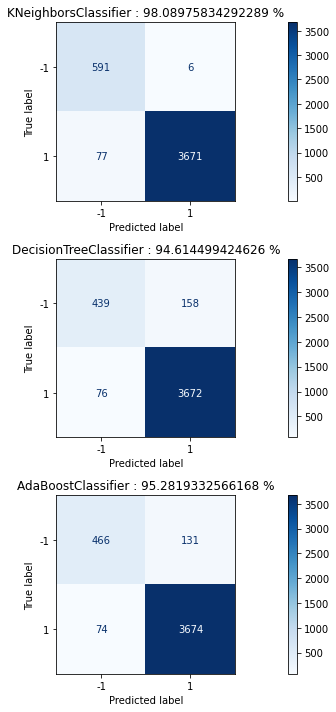

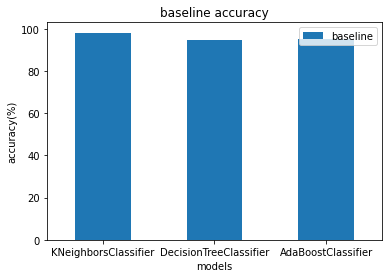

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

models = [KNeighborsClassifier(),DecisionTreeClassifier(),AdaBoostClassifier()]

models_name , org_accuracy_list = train_test_plot( models , trX , trY , teX , teY )

#plot_barchar([models_name] , [org_accuracy_list] , title = "baseline accuracy",legend_labels=['normal Dataset'])
plot_barchar(models_name , { 'baseline' : org_accuracy_list},title = 'baseline accuracy',xlabel='models',ylabel='accuracy(%)' )

#### Q2 Over/UnderSampling and get the accuracy of selected Models

SMOTE , ADASYN : https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [ ]:
pip install imbalanced-learn

**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# over sample using SMOTE
smote = SMOTE(random_state = rs)

SMOTE_trX , SMOTE_trY  = smote.fit_resample(trX,trY)

# destricution of output before & after SMOTE

print(f'distribution of output before SMOTE : {Counter(trY)}\ndestricution of output after SMOTE : {Counter(SMOTE_trY)}')

distribution of output before SMOTE : Counter({1: 8839, -1: 1300})
destricution of output after SMOTE : Counter({1: 8839, -1: 8839})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

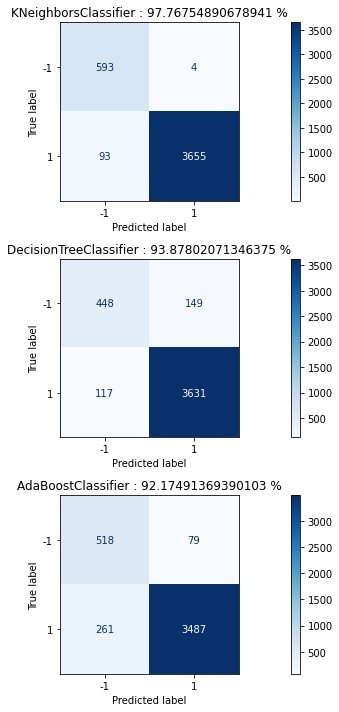

In [ ]:
models = [KNeighborsClassifier(),DecisionTreeClassifier(),AdaBoostClassifier()]

models_name , SMOTE_accuracy_list = train_test_plot( models , SMOTE_trX , SMOTE_trY , teX , teY )

**ADASYN**

In [ ]:
from imblearn.over_sampling import ADASYN

# over sample using ADASYN
adasyn = ADASYN(random_state = rs)

ADASYN_trX , ADASYN_trY  = adasyn.fit_resample(trX,trY)

# destricution of output before & after ADASYN

print(f'distribution of output before ADASYN : {Counter(trY)}\ndestricution of output after ADASYN : {Counter(ADASYN_trY)}')

distribution of output before ADASYN : Counter({1: 8839, -1: 1300})
destricution of output after ADASYN : Counter({-1: 8879, 1: 8839})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

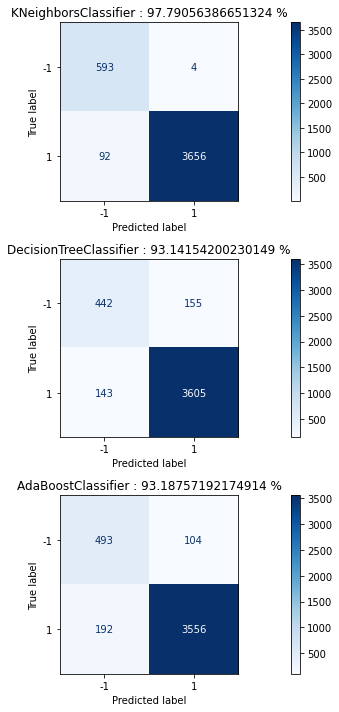

In [ ]:
models = [KNeighborsClassifier(),DecisionTreeClassifier(),AdaBoostClassifier()]

models_name , ADASYN_accuracy_list = train_test_plot( models , ADASYN_trX , ADASYN_trY , teX , teY )


**Random Undersampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler()

underSample_trX , underSample_trY = undersample.fit_resample(trX,trY)

print(f'distribution of output before underSample : {Counter(trY)}\ndestricution of output after underSample : {Counter(underSample_trY)}')

distribution of output before underSample : Counter({1: 8839, -1: 1300})
destricution of output after underSample : Counter({-1: 1300, 1: 1300})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



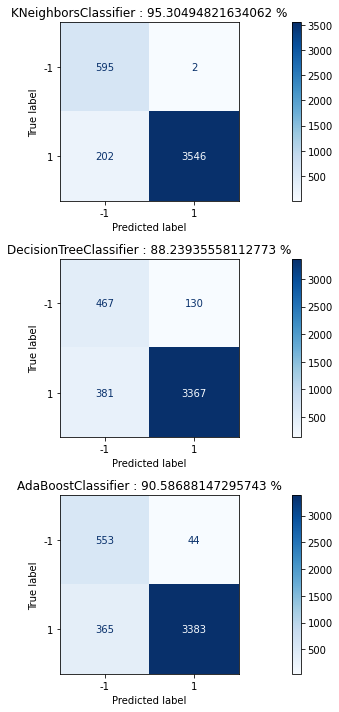

In [ ]:
models = [KNeighborsClassifier(),DecisionTreeClassifier(),AdaBoostClassifier()]

models_name , underSample_accuracy_list = train_test_plot( models , underSample_trX , underSample_trY , teX , teY )

**model vs Accuracy with different over/undersampling**

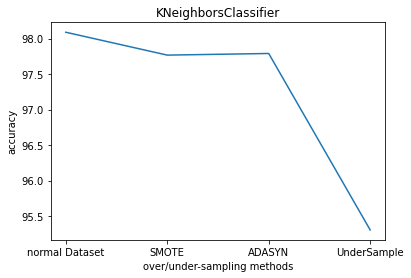

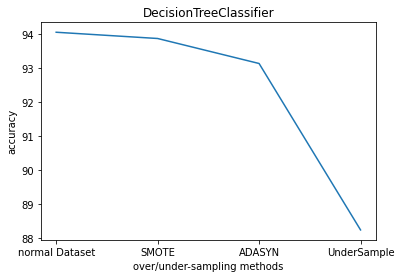

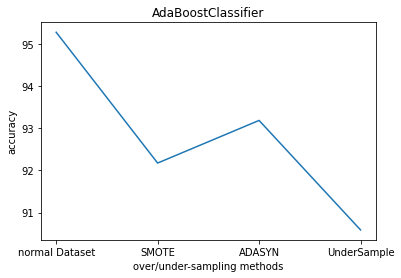

In [ ]:
for i , model in enumerate(models):
  plt.plot(['normal Dataset','SMOTE','ADASYN','UnderSample'],
          [org_accuracy_list[i],SMOTE_accuracy_list[i],ADASYN_accuracy_list[i],underSample_accuracy_list[i]])

  plt.title(type(model).__name__)
  plt.ylabel('accuracy')
  plt.xlabel('over/under-sampling methods')
  plt.show()

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)

In [ ]:
print(models_name)
print(f'org_accuracy list : {org_accuracy_list} ')
print(f'After SMOTE : {SMOTE_accuracy_list}  , average : {Average(SMOTE_accuracy_list)}')
print(f'After ADASYN : {ADASYN_accuracy_list} , average : {Average(ADASYN_accuracy_list)}')
print(f'After undersampling : {underSample_accuracy_list} , average : {Average(underSample_accuracy_list)}')

['KNeighborsClassifier', 'DecisionTreeClassifier', 'AdaBoostClassifier']
org_accuracy list : [98.08975834292289, 94.06214039125432, 95.2819332566168] 
After SMOTE : [97.76754890678941, 93.87802071346375, 92.17491369390103]  , average : 94.60682777138474
After ADASYN : [97.79056386651324, 93.14154200230149, 93.18757192174914] , average : 94.70655926352129
After undersampling : [95.30494821634062, 88.23935558112773, 90.58688147295743] , average : 91.37706175680859




    for KNN : ADASYN achieves higher accuracy
    for Decision Tree :  SMOTE achieves higher accuracy
    for adaboost : ADASYN achieves higher accuracy


    we will continue with ADASYN as it achieves the highest average accuracy

**Bar char of each model with over/inder sampling accuracies**

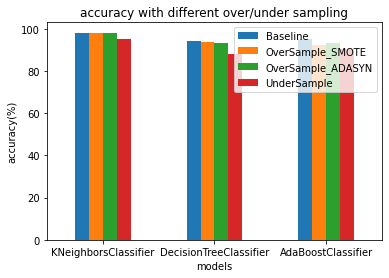

In [ ]:
plot_barchar(models_name , 
             { 'Baseline' : org_accuracy_list , 'OverSample_SMOTE':SMOTE_accuracy_list,'OverSample_ADASYN':ADASYN_accuracy_list,'UnderSample':underSample_accuracy_list},
             title = 'accuracy with different over/under sampling',xlabel='models',ylabel='accuracy(%)')

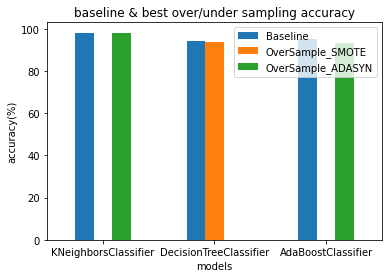

In [ ]:
plot_barchar(models_name , 
             { 'Baseline' : org_accuracy_list ,
              'OverSample_SMOTE':[0,SMOTE_accuracy_list[1],0],
              'OverSample_ADASYN':[ADASYN_accuracy_list[0],0,ADASYN_accuracy_list[2]]},
             title = 'baseline & best over/under sampling accuracy',xlabel='models',ylabel='accuracy(%)')

#### Q3: Apply feature selection and dimension reduction methods

In [ ]:
def apply_featureSelection_model(featureSelection , models , adasyn_tr_x , adasyn_tr_y , te_x , te_y ):

  accuracies = []

  selection = featureSelection
  

  selection.fit(adasyn_tr_x)
  adasyn_pca_trX = selection.transform(adasyn_tr_x)
  adasyn_pca_teX = selection.transform(te_x)

  accuracies = train_test(models , adasyn_pca_trX , adasyn_tr_y , adasyn_pca_teX , te_y )

  return accuracies

def plot_line(models , accuracy_list):

  fig, axes = plt.subplots(nrows = 3 , ncols = 1 , figsize=(10,15))

  for i ,(model , acc_list , ax) in enumerate(zip(models , accuracy_list , axes.flatten())):

    
    ax.plot(range(3,11,1) , acc_list)

    ax.title.set_text(type(model).__name__)
    ax.set_xlabel("# features")
    ax.set_ylabel("accuracy")

  plt.tight_layout()
  plt.show()

##### **1 - PCA**

In [ ]:
from sklearn.decomposition import PCA

models = [KNeighborsClassifier(),DecisionTreeClassifier(),AdaBoostClassifier()]

#list of lists of each model accuracies with different number of features

fs_model_accuracies = [[] for i in range(len(models))]

for nc in range(3,11):

  pca = PCA(n_components = nc , random_state = rs)

  accuracies = apply_featureSelection_model(pca , models , ADASYN_trX , ADASYN_trY , teX , teY )


  for i in range(len(models)):
    fs_model_accuracies[i].append(accuracies[i])


In [ ]:
# includes max index for accuracy of each model (hold 3 values)
max_indecies = [] 
for i in range(len(models)):
  idx  = np.argmax(fs_model_accuracies[i])
  print(f'In {type(models[i]).__name__} #features : {idx+3}   with accuracy : {fs_model_accuracies[i][idx]}')
  max_indecies.append(idx)

In KNeighborsClassifier #features : 4   with accuracy : 97.9746835443038
In DecisionTreeClassifier #features : 3   with accuracy : 98.15880322209436
In AdaBoostClassifier #features : 9   with accuracy : 92.56616800920598


In [ ]:
def plot_confusion(model , nfeatures , tr_x = ADASYN_trX , tr_y = ADASYN_trY , te_x = teX , te_y = teY , randomState = rs ):
  #apply pca
  pca = PCA(n_components = nfeatures , random_state = randomState)
  pca.fit(tr_x)
  transformed_train = pca.transform(tr_x)
  transformed_test = pca.transform(te_x)
  #fit model
  model.fit(transformed_train , tr_y)
  #predict & plot confusion matrix
  acc = predict(model , transformed_test , te_y , plot = True)
  
  return acc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



97.9746835443038

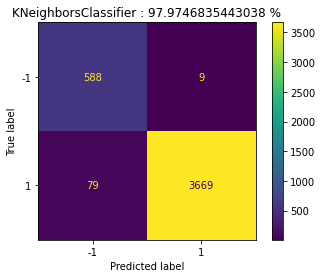

In [ ]:
plot_confusion(KNeighborsClassifier() , nfeatures = 4 , tr_x = ADASYN_trX , tr_y = ADASYN_trY , te_x = teX , te_y = teY , randomState = rs )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



98.13578826237054

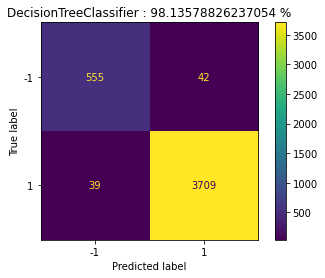

In [ ]:
plot_confusion(DecisionTreeClassifier() , nfeatures = 3 , tr_x = ADASYN_trX , tr_y = ADASYN_trY , te_x = teX , te_y = teY , randomState = rs )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



92.56616800920598

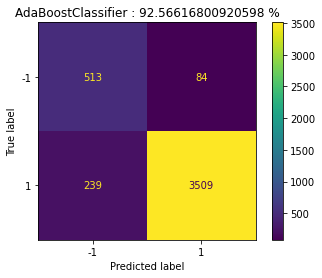

In [ ]:
plot_confusion(AdaBoostClassifier() , nfeatures = 9 , tr_x = ADASYN_trX , tr_y = ADASYN_trY , te_x = teX , te_y = teY , randomState = rs )

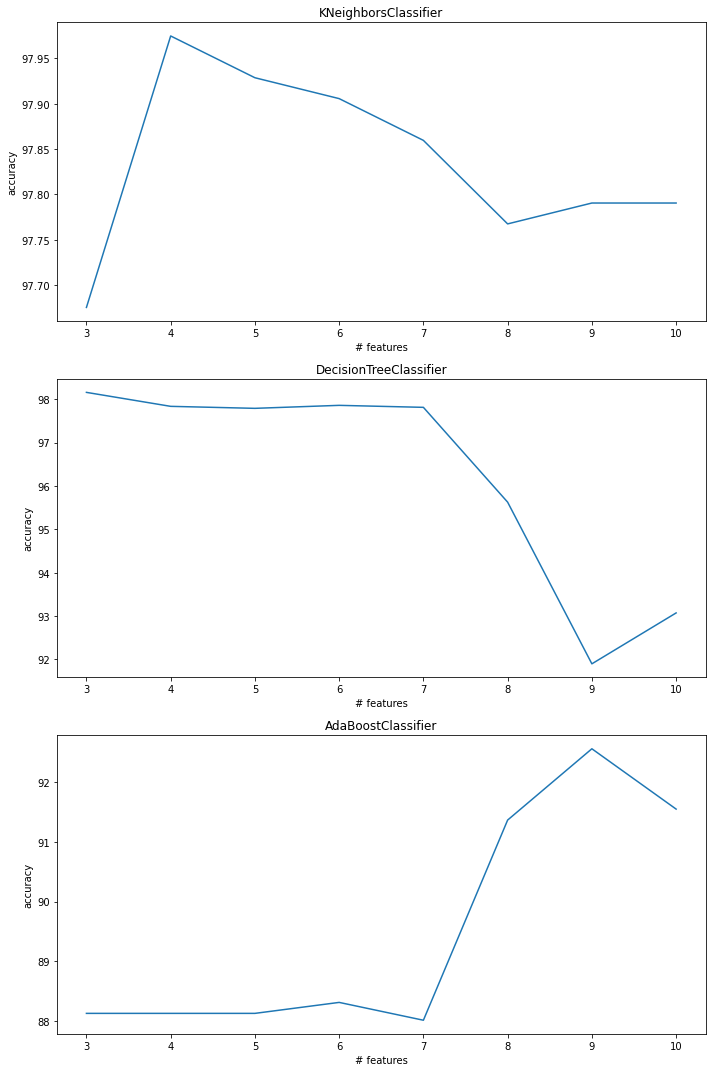

In [ ]:
plot_line(models , fs_model_accuracies)

##### 2 - plot barchar of best accuracy with original

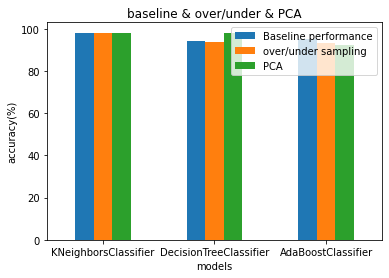

In [ ]:
featureSelctionAcc = [fs_model_accuracies[i][max_indecies[i]] for i in range(len(models))] 
names = [type(model).__name__ for model in models]

plot_barchar(models_name , 
             { 'Baseline performance' : org_accuracy_list ,
              'over/under sampling':[ADASYN_accuracy_list[0],SMOTE_accuracy_list[1],ADASYN_accuracy_list[2]],
              'PCA':featureSelctionAcc},
             title = 'baseline & over/under & PCA',xlabel='models',ylabel='accuracy(%)')

3- plot t-sne before & after PCA

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

In [ ]:
def Visualize_TSNE(features , labels):

  #stack features & labels together
  data = np.hstack((features , labels.reshape(labels.shape[0],1)))

  # convert numpy array into dataframe to be able to use px
  dataFrame = pd.DataFrame( data , columns=["Feature1","Feature2","Type"])
  

  fig = px.scatter(data_frame = dataFrame , x = "Feature1" , y = "Feature2"  ,color = "Type")
  fig.show()


**Before**

**ADASYN**

In [ ]:
adasyn_tsne = TSNE(n_components = 2 ,random_state=rs).fit_transform(ADASYN_trX)
Visualize_TSNE(adasyn_tsne , ADASYN_trY)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



**After PCA**

DASYN --> 3 features

In [ ]:
def apply_sampling_PCA(nc , randomState , tr_x , tr_y , te_x):
  pca = PCA(n_components = nc , random_state = randomState)
  transformed_train = pca.fit_transform(tr_x)
  transformed_test = pca.transform(te_x)

  TSNE_data = TSNE(n_components = 2 ,random_state=rs).fit_transform(transformed_train)
  Visualize_TSNE(TSNE_data , tr_y)

  return transformed_train , transformed_test

In [ ]:
adasyn_pca_train , pca_test = apply_sampling_PCA(nc = 3 , randomState = rs , tr_x = ADASYN_trX , tr_y = ADASYN_trY , te_x = teX)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



#### Q4: stacked 

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import f1_score
s_models = [('KNN',KNeighborsClassifier()),('DecisionTree',DecisionTreeClassifier()) , ('adaBoost',AdaBoostClassifier()) ] 
stacking = StackingClassifier(estimators=s_models)

stacking.fit(adasyn_pca_train, ADASYN_trY )
predY = stacking.predict(pca_test)
stacking_f1 = f1_score(teY, predY, average='weighted')
stacking_acc = accuracy_score(y_true = teY , y_pred = predY)*100
print(f'stacking accuracy : {stacking_acc} , f1 score : {stacking_f1}')

stacking accuracy : 97.65247410817031 , f1 score : 0.9770353050190179


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'StackingClassifier : 97.65247410817031 %')

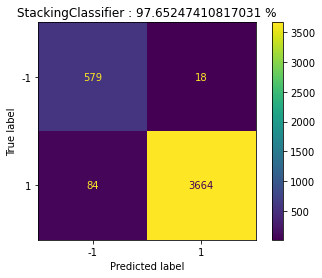

In [ ]:
plot_confusion_matrix(estimator = stacking , X = pca_test , y_true = teY)
title = type(stacking).__name__+' : '+str(stacking_acc)+' %'
plt.title(title)

**Comparision between different results**

In [ ]:
print(f'baseline accuracy : {org_accuracy_list}')
print(f'over/under sampling : {[ADASYN_accuracy_list[0],SMOTE_accuracy_list[1],ADASYN_accuracy_list[2]]}')
print(f'PCA with different #features: {featureSelctionAcc}')
print(f'stacking : {stacking_acc}')

baseline accuracy : [98.08975834292289, 94.43037974683544, 95.2819332566168]
over/under sampling : [97.79056386651324, 93.87802071346375, 93.18757192174914]
PCA with different #features: [97.9746835443038, 98.15880322209436, 92.56616800920598]
stacking : 97.65247410817031


In [ ]:
models

[KNeighborsClassifier(), DecisionTreeClassifier(), AdaBoostClassifier()]

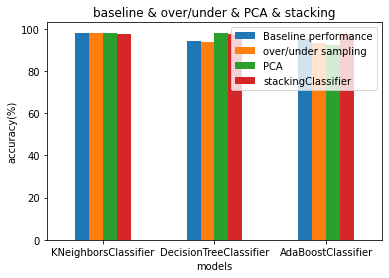

In [ ]:
plot_barchar(['KNeighborsClassifier' , 'DecisionTreeClassifier' , 'AdaBoostClassifier'] , 
             { 'Baseline performance' : org_accuracy_list ,
              'over/under sampling':[ADASYN_accuracy_list[0],SMOTE_accuracy_list[1],ADASYN_accuracy_list[2]],
              'PCA':featureSelctionAcc , 
              'stackingClassifier': [stacking_acc for i in range(3)]},
             title = 'baseline & over/under & PCA & stacking',xlabel='models',ylabel='accuracy(%)')

### **Part 2**

MLP classifier along with clustering approach

#### Q5 with functions 

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

**MinMaxScaler**

In [ ]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
#print(scaled)
scaled_trX= scaler.fit_transform(trX)
scaled_teX= scaler.fit_transform(teX)
#print(scaled_trX)

**Hyper parameter tuning**

In [ ]:
mlp = MLPClassifier(activation="tanh", solver='sgd', hidden_layer_sizes=(15,15) )
parameter_space = {
    'momentum':[ 0.5 , 0.6 , 0.7, 0.8, 0.9 , 0.99],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(scaled_trX, trY)

In [ ]:
print(clf.best_params_)

{'learning_rate': 'adaptive', 'momentum': 0.99}


**Functions**

In [ ]:
def average(lis):
  return sum(lis)/len(lis)

def MLP_fit_predict_plot(model,tr_x,tr_y,te_x,te_y ,avg_fn = average , no_runs = 10 , nrows = 5 , n_cols = 2  , figSize = (15,10)):

  testing_acc = []
  fig, axes = plt.subplots(nrows = nrows , ncols = n_cols , figsize=figSize)

  for i , ax in zip(range(no_runs),axes.flatten()):

    model.fit(tr_x, tr_y)
    yPred = model.predict(te_x)
    acc = accuracy_score(te_y, yPred) * 100
    testing_acc.append(acc)

    # plot confusion matrix
    plot_confusion_matrix(model , te_x , te_y , ax = ax , cmap = "Blues")

    # set title of figure with model name and the accuracy
    title = type(model).__name__+' ('+str(i+1)+') : '+str(acc)+' %'
    ax.title.set_text(title)
  
  plt.tight_layout()
  plt.show()

  avg_acc = avg_fn(testing_acc)

  return testing_acc , avg_acc

def MLP_fit_predict(model,tr_x,tr_y,te_x,te_y ,avg_fn = average , no_runs = 10 ):

  testing_acc = []
  
  for i  in range(no_runs):

    mlp_model = MLPClassifier(activation="tanh", solver='sgd', hidden_layer_sizes=(15,15) , learning_rate = 'adaptive', momentum = 0.99 )
    model.fit(tr_x, tr_y)
    yPred = model.predict(te_x)
    acc = accuracy_score(te_y, yPred) * 100
    testing_acc.append(acc)

  avg_acc = avg_fn(testing_acc)

  return testing_acc , avg_acc

##### 1 - Apply MLP , Accuracy , plot confusion matrix

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matr

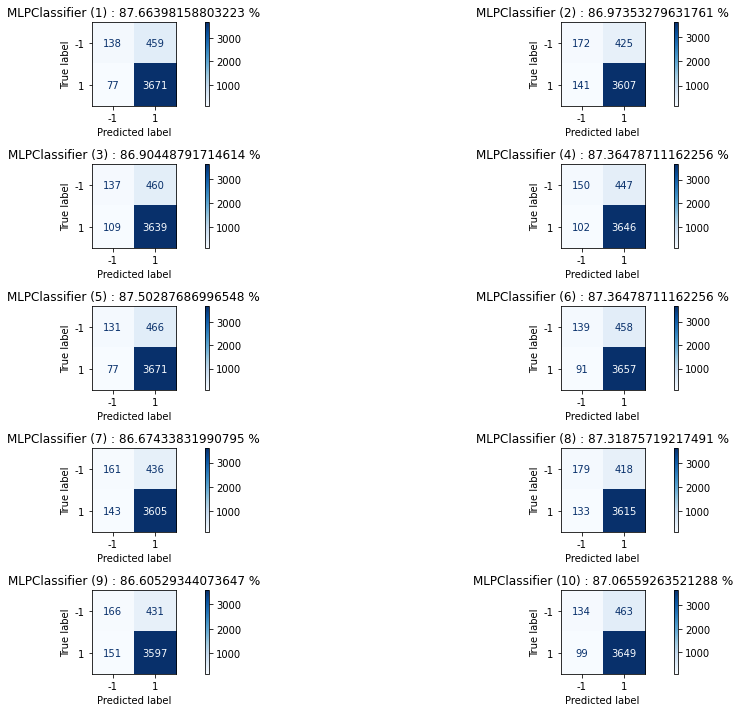

In [ ]:
train_accuracy = []
test_accuracy = []

mlp_model = MLPClassifier(activation="tanh", solver='sgd', hidden_layer_sizes=(15,15) , learning_rate = 'adaptive', momentum = 0.99 )

te_acc_list , te_avg_acc = MLP_fit_predict_plot(mlp_model,scaled_trX,trY,scaled_teX,teY ,avg_fn = average , no_runs = 10 )

In [ ]:
print(f'testing average : {te_avg_acc} ,  test accuracy : {te_acc_list}')

testing average : 87.14384349827387 ,  test accuracy : [87.66398158803223, 86.97353279631761, 86.90448791714614, 87.36478711162256, 87.50287686996548, 87.36478711162256, 86.67433831990795, 87.31875719217491, 86.60529344073647, 87.06559263521288]


In [ ]:
baseline_acc = te_avg_acc

##### 2 - Apply MLP with wrapper (find best feature combination)

In [ ]:
def select_feature(X_TR, y_TR, X_TS, y_TS, FSM, MODEL):
  
  testing_acc = []

  fs = FSM
  fs.fit(X_TR, y_TR)
  X_TR_new = fs.transform(X_TR)
  X_TS_new = fs.transform(X_TS) 

  testing_acc , avg_acc = MLP_fit_predict(MODEL,X_TR_new,y_TR,X_TS_new,y_TS ,avg_fn = average , no_runs = 10 )
  
  return avg_acc

def WrapperMethod(xtrain , ytrain  , xtest , ytest , Model , MAXAcc ):
  acc_dict = {}
  for Nfeatures in range(1,10):

    sffs = SequentialFeatureSelector(Model,
                                     n_features_to_select = Nfeatures ,
                                     scoring = 'accuracy',
                                     direction = 'backward',
                                     n_jobs = -1 )
    
    acc = select_feature(xtrain , ytrain  , xtest , ytest , sffs , Model)
    acc_dict[Nfeatures] = acc

  plt.figure(figsize = (12,8))
  plt.plot(*zip(*sorted(acc_dict.items())))
  Title = "Backward Feature Selection Method"
  plt.title(Title, fontsize=16)
  plt.xlabel("Number of Features", fontsize=16)
  plt.ylabel("Accuracy (%)", fontsize=16)

  plt.axhline(y=(MAXAcc),color ="r")
  plt.legend(["Backward_performance","Baseline_performance"], loc="upper left")

  plt.show()

  print("Maximum accuracy: ", max(acc_dict.values()))
  print(f"baseline accuracy: {MAXAcc}%" )
  print("Best number of features:", max(acc_dict, key=acc_dict.get))
  
  return acc_dict

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

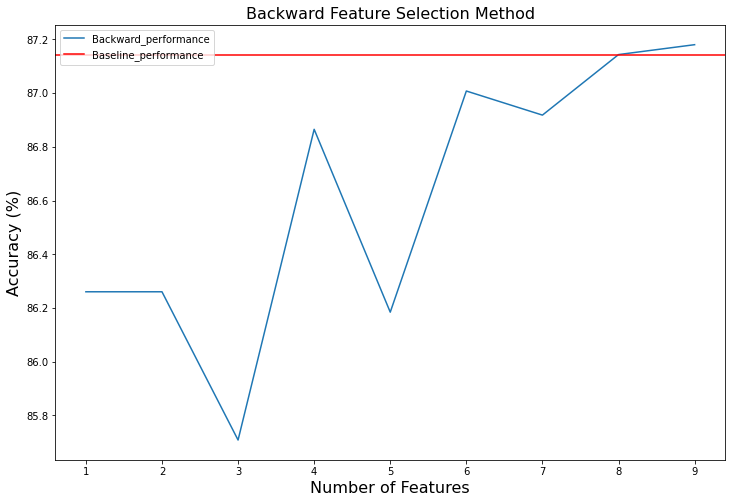

Maximum accuracy:  87.18066743383199
baseline accuracy: 87.14384349827387%
Best number of features: 9


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

Model = MLPClassifier(activation="tanh", solver='sgd', hidden_layer_sizes=(15,15) , learning_rate = 'adaptive', momentum = 0.99 )
wrapper_acc_dict = WrapperMethod(scaled_trX , trY  , scaled_teX , teY , Model , baseline_acc)

In [ ]:
wrapper_acc_dict

{1: 86.26006904487917,
 2: 86.26006904487917,
 3: 85.70771001150749,
 4: 86.86536248561565,
 5: 86.18411967779056,
 6: 87.00805523590334,
 7: 86.91829689298045,
 8: 87.14384349827387,
 9: 87.18066743383199}

  
    observe the best combination of features to be used later

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

# get best feature combination

mlp_model = MLPClassifier(activation="tanh", solver='sgd', hidden_layer_sizes=(15,15) , learning_rate = 'adaptive', momentum = 0.99 )

sffs = SequentialFeatureSelector(mlp_model,
                                  n_features_to_select = 9 ,
                                  scoring = 'accuracy',
                                  direction = 'backward',
                                  n_jobs = -1 )

sffs.fit(scaled_trX, trY)

wrapper_trX = sffs.transform(scaled_trX)
wrapper_teX = sffs.transform(scaled_teX)

In [ ]:
wrapper_trX.shape

(10139, 9)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matr

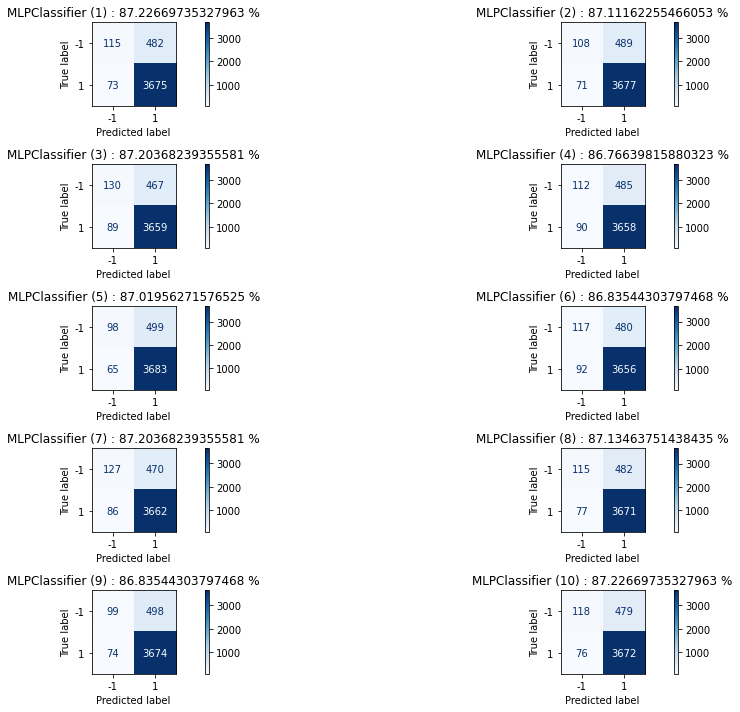

In [ ]:
# plot confusion matrix for best feature combination
mlp_model = MLPClassifier(activation="tanh", solver='sgd', hidden_layer_sizes=(15,15) , learning_rate = 'adaptive', momentum = 0.99 )
te_acc_list , te_avg_acc = MLP_fit_predict_plot(mlp_model,wrapper_trX,trY,wrapper_teX,teY ,avg_fn = average , no_runs = 10 )

In [ ]:
print(f'average testing accuracy : {te_avg_acc} %')

average testing accuracy : 87.05638665132336 %


In [ ]:
wrapper_baseline_acc = te_avg_acc

##### 3 - SOM

In [ ]:
pip install sklearn_som

In [ ]:
from tqdm import tqdm
from sklearn_som.som import SOM
from sklearn.metrics import silhouette_score

**SOM**
    
      find the best k for SOM bby plotting corresponding accuracies

In [ ]:
dim = wrapper_trX.shape[1]

k_acc_dict = {}

mlp_model = MLPClassifier(activation="tanh", solver='sgd', hidden_layer_sizes=(15,15) , learning_rate = 'adaptive', momentum = 0.99 )

for k in tqdm(range(2,9)):

    som_model = SOM(m=k, n=k, dim=dim, lr=0.5 , random_state=rs)
    tr_predClusters = som_model.fit_predict(wrapper_trX)
    te_predClusters = som_model.predict(wrapper_teX)

    # Add cluster number attribute to best feature combination
    wrapper_cluster_trX = np.insert(wrapper_trX, wrapper_trX.shape[1] , tr_predClusters, axis=1)
    wrapper_cluster_teX = np.insert(wrapper_teX, wrapper_teX.shape[1] , te_predClusters, axis=1)


    #Train MLP after adding cluster number attribute
    _ , avg_acc = MLP_fit_predict(mlp_model,wrapper_cluster_trX,trY,wrapper_cluster_teX,teY)
    k_acc_dict[k] = avg_acc
    

  0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-p

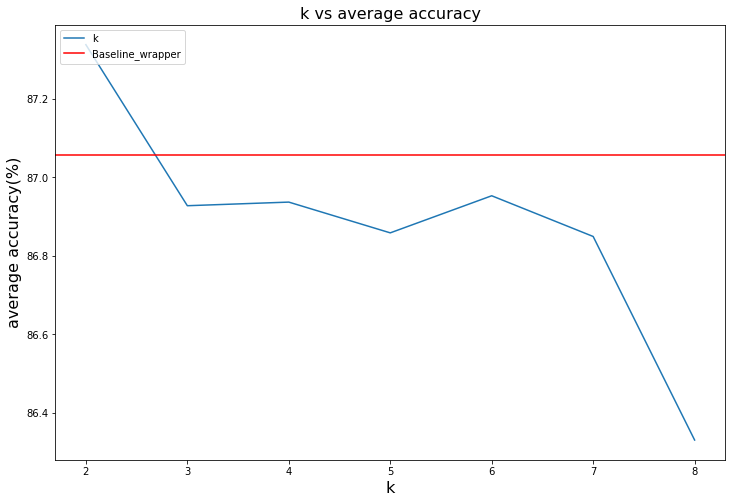

Maximum accuracy:  87.33716915995397
baseline accuracy: 87.05638665132336%
Best k : 2


In [ ]:
plt.figure(figsize = (12,8))
plt.xticks([i for i in range(2,10)])
plt.plot(*zip(*sorted(k_acc_dict.items())))
Title = "k vs average accuracy"
plt.title(Title, fontsize=16)
plt.xlabel("k", fontsize=16)
plt.ylabel("average accuracy(%)", fontsize=16)

plt.axhline(y=(wrapper_baseline_acc),color ="r")
plt.legend(["k","Baseline_wrapper"], loc="upper left")

plt.show()

print("Maximum accuracy: ", max(k_acc_dict.values()))
print(f"baseline accuracy: {wrapper_baseline_acc}%" )
print("Best k :", max(k_acc_dict, key=k_acc_dict.get))

In [ ]:
# get wrapper + cluster_num with k that acheves higher accuracy
dim = wrapper_trX.shape[1]
som_model = SOM(m=2, n=2, dim=dim, lr=0.5 , random_state=rs)
tr_predClusters = som_model.fit_predict(wrapper_trX)
te_predClusters = som_model.predict(wrapper_teX)

# Add cluster number attribute to best feature combination
wrapper_cluster_trX_k = np.insert(wrapper_trX, wrapper_trX.shape[1] , tr_predClusters, axis=1)
wrapper_cluster_teX_k = np.insert(wrapper_teX, wrapper_teX.shape[1] , te_predClusters, axis=1)

In [ ]:
wrapper_cluster_trX_k.shape

(10139, 10)

In [ ]:
som_baseline_acc = max(k_acc_dict.values())

In [ ]:
som_baseline_acc

87.33716915995397

##### 4 - Tune hidden layers(3-10) and number of neurons(10-30)

In [ ]:
hidden_range = range(3,11)
neurons_range = range(10,31)
hidden_range

range(3, 11)

In [ ]:
hidden_dict = dict()
neurons_dict = dict()


for num_hidden in tqdm(hidden_range):

  for num_neurons in tqdm(neurons_range):

    # each item represent # neurons in the hidden layer
    neurons_hiddenLayer = tuple([ num_neurons for i in range(num_hidden)])

    mlp_model = MLPClassifier(activation="tanh",
                              solver='sgd',
                              hidden_layer_sizes = neurons_hiddenLayer ,
                              learning_rate = 'adaptive',
                              momentum = 0.99 )

    _ , avg_accuracy = MLP_fit_predict(mlp_model , wrapper_cluster_trX_k,trY,wrapper_cluster_teX_k,teY)

    hidden_dict[num_hidden] = avg_accuracy
    neurons_dict[num_neurons] = avg_accuracy

**plotting**

In [ ]:
def plot_dict(dictionary , title , baseline , legend_labels , xlab , ylab , xticks , best_label ,fontSize = 16):
  plt.figure(figsize = (12,8))
  plt.xticks(xticks)
  plt.plot(*zip(*sorted(dictionary.items())))
  
  plt.title(title, fontsize=fontSize)
  plt.xlabel(xlab, fontsize=fontSize)
  plt.ylabel(ylab, fontsize=fontSize)

  plt.axhline(y=(baseline),color ="r")
  plt.legend(legend_labels, loc="upper left")

  plt.show()

  print("Maximum accuracy: ", max(dictionary.values()))
  print(f"baseline accuracy of SOM: {baseline}%" )
  print(f"Best {best_label} : {max(dictionary, key=dictionary.get)}")

  return max(dictionary.values()) , baseline , max(dictionary, key=dictionary.get)

**plotting #hidden vs accuracy**

In [ ]:
plot_dict(dictionary = hidden_dict,
          title = "#hidden layers vs average accuracy" ,
          baseline = som_baseline_acc ,
          legend_labels = ["hidden_Layers","Baseline_SOM"] ,
          xlab = "# hidden layers",
          ylab = "average accuracy(%)",
          xticks = [i for i in hidden_range],
          best_label = '# hidden layers',
          fontSize = 16)

**plotting #neurons vs accuracy**

In [ ]:
plot_dict(dictionary = neurons_dict,
          title = "# neurons vs average accuracy" ,
          baseline = som_baseline_acc ,
          legend_labels = ["# neurons","Baseline_SOM"] ,
          xlab = "# neurons",
          ylab = "average accuracy(%)",
          xticks = [i for i in neurons_range],
          best_label = '# neurons'
          fontSize = 16)